# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [40]:
# naložimo paket
import pandas as pd
import os.path
# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# izberemo interaktivni "notebook" stil risanja
%matplotlib notebook
# naložimo razpredelnico, s katero bomo delali
filmi = pd.read_csv(os.path.join('../../', '02-zajem-podatkov', 'predavanja', 'obdelani-podatki','filmi.csv'), index_col='id')

Poglejmo si podatke.

In [3]:
filmi

## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [4]:
filmi.sort_values('ocena')

Poberite stolpec ocen.

In [6]:
ocena = filmi['ocena']

Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [ ]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [7]:
ocena_rounded = round(ocena)

Dodajte zaokrožene vrednosti v podatke.

In [9]:
filmi['ocena_rounded'] = ocena_rounded
filmi.tail(3)

Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [11]:
filmi.drop(columns = 'ocena_rounded')

### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [16]:
filmi_simple_view = filmi[['naslov','leto','glasovi']]
filmi_simple = filmi_simple_view.copy()
filmi_simple['ocena_rounded'] = ocena_rounded
filmi_simple

### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [22]:
before = filmi['leto'] < 1930
after = filmi['leto'] > 2017
filmi[before | after]

Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [26]:
def short_name(x):
    words = x.split()
    return len(words) <= 2

short_name = filmi['naslov'].apply(short_name)
well_rated = filmi['ocena'] > 8
filmi[short_name & well_rated]

### Histogrami

Združite filme po ocenah in jih preštejte.

In [33]:
rating_frequency = filmi.groupby('ocena').size()

Naredite stolpični diagram teh podatkov.

In [37]:
rating_frequency.plot.bar()

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

In [36]:
filmi_simple[['ocena_rounded']].hist()

### Izris povprečne dolžine filma glede na leto

In [41]:
films_by_year = filmi.groupby('leto')
means_by_year = films_by_year.mean()

In [ ]:
mean_dolzina = means_by_year[['dolzina']]
mean_dolzina.plot()

### Izris skupnega zasluzka za posamezno leto

<AxesSubplot:xlabel='leto'>

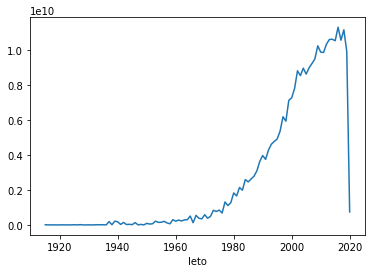

In [43]:
filmi_po_letu.sum()["zasluzek"].plot()
#namesto sum je dal tudi mean?

In [ ]:
films_by_year.sum()[['zasluzek']].plot()